In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [59]:
dataset = pd.read_csv("https://github.com/MainakRepositor/Datasets/raw/master/energy_efficiency_data.csv")

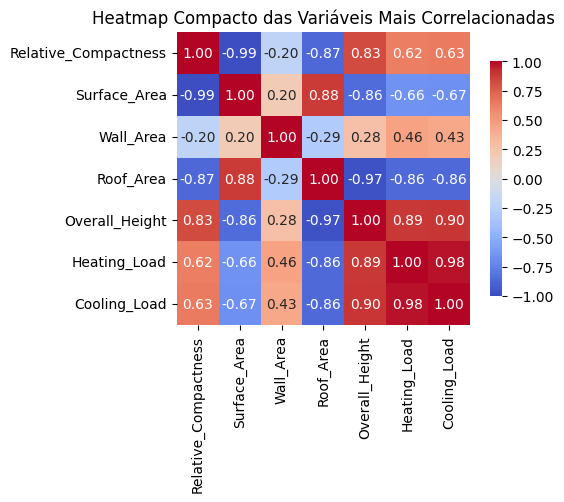

In [60]:
corr = dataset.corr()

# Filtra apenas as variáveis com r >= 0.40 com Heating_Load
mask = corr["Heating_Load"].abs() >= 0.40
vars_relevantes = corr.index[mask].tolist() + ["Heating_Load"]
vars_relevantes = list(dict.fromkeys(vars_relevantes))  # remove duplicatas

corr_sub = corr.loc[vars_relevantes, vars_relevantes]

plt.figure(figsize=(6,5))
sns.heatmap(
    corr_sub,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    cbar_kws={"shrink": .8},
    square=True
)
plt.title("Heatmap Compacto das Variáveis Mais Correlacionadas")
plt.tight_layout()
plt.savefig("heatmap_compacto.png")
plt.show()

In [61]:
X = dataset.drop(columns=['Heating_Load'])
y = dataset['Heating_Load'].values

In [62]:
scaler = StandardScaler()
XProcessado = scaler.fit_transform(X)

In [63]:
#gradiente
modeloGD = SGDRegressor(
    max_iter=5000,
    tol=1e-4,
    eta0=0.01,
    learning_rate='adaptive',
    penalty='l2',
    early_stopping=True,
    random_state=0
)
modeloGD.fit(XProcessado, y)
yPreditoGD = modeloGD.predict(XProcessado)

In [64]:
print("MSE Gradiente Descendente:", mean_squared_error(y, yPreditoGD))

MSE Gradiente Descendente: 3.1569238234172983


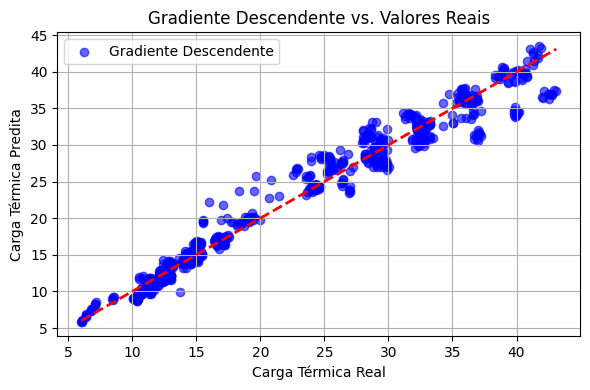

In [65]:
#plotando o graf
plt.figure(figsize=(6,4))
plt.scatter(y, yPreditoGD, alpha=0.6, label='Gradiente Descendente', color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Carga Térmica Real')
plt.ylabel('Carga Térmica Predita')
plt.legend()
plt.title('Gradiente Descendente vs. Valores Reais')
plt.grid(True)
plt.tight_layout()
plt.savefig('gradienteDescVsReal.png')